<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group-7/Kaggle-Challange/blob/EDA/Kaggle_Challange_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


In [20]:
train_data_path = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-7/Kaggle-Challange/main/train.csv'
test_data_path = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Group-7/Kaggle-Challange/main/test.csv'
train_dataset = pd.read_csv(train_data_path)
test_dataset = pd.read_csv(test_data_path)

In [21]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [23]:
print(train_dataset.info())
print(train_dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.00000

In [24]:
print(test_dataset.info())
print(test_dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269 

In [43]:
missing_values_train = train_dataset.isnull().sum()
missing_values_test = test_dataset.isnull().sum()
missing_values_percentage_train = train_dataset.isnull().mean()*100
missing_values_percentage_test = test_dataset.isnull().mean()*100
print("Missing values in train dataset:\n", missing_values_train)
print("\nPercentage of missing values in train dataset:\n", missing_values_percentage_train)
print("\nMissing values in test dataset:\n", missing_values_test)
print("\nPercentage of missing values in test dataset:\n", missing_values_percentage_test)

Missing values in train dataset:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Percentage of missing values in train dataset:
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Missing values in test dataset:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDec

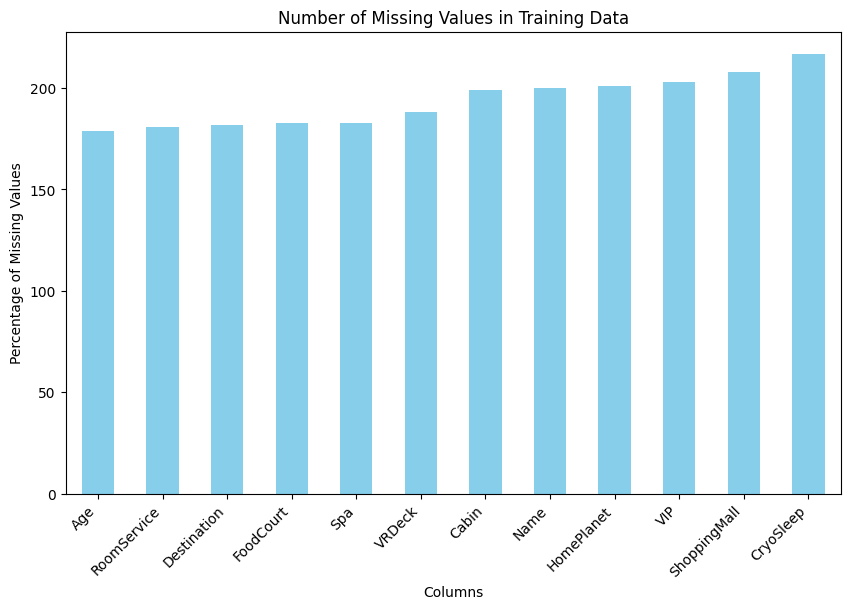

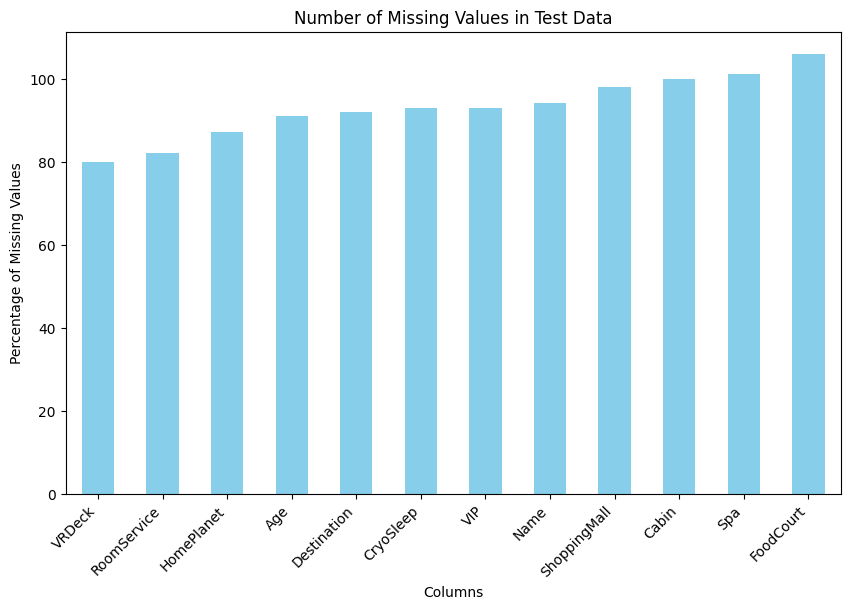

In [33]:
def plot_missing_values(data, title):
  missing_values = data.isnull().sum()
  missing_values = missing_values[missing_values > 0]  # Filter columns with missing values
  missing_values.sort_values(inplace=True)

  plt.figure(figsize=(10, 6))
  missing_values.plot(kind='bar', color='skyblue')
  plt.title(title)
  plt.xlabel('Columns')
  plt.ylabel('Percentage of Missing Values')
  plt.xticks(rotation=45, ha='right')
  plt.show()

plot_missing_values(train_dataset, 'Number of Missing Values in Training Data')
plot_missing_values(test_dataset, 'Number of Missing Values in Test Data')

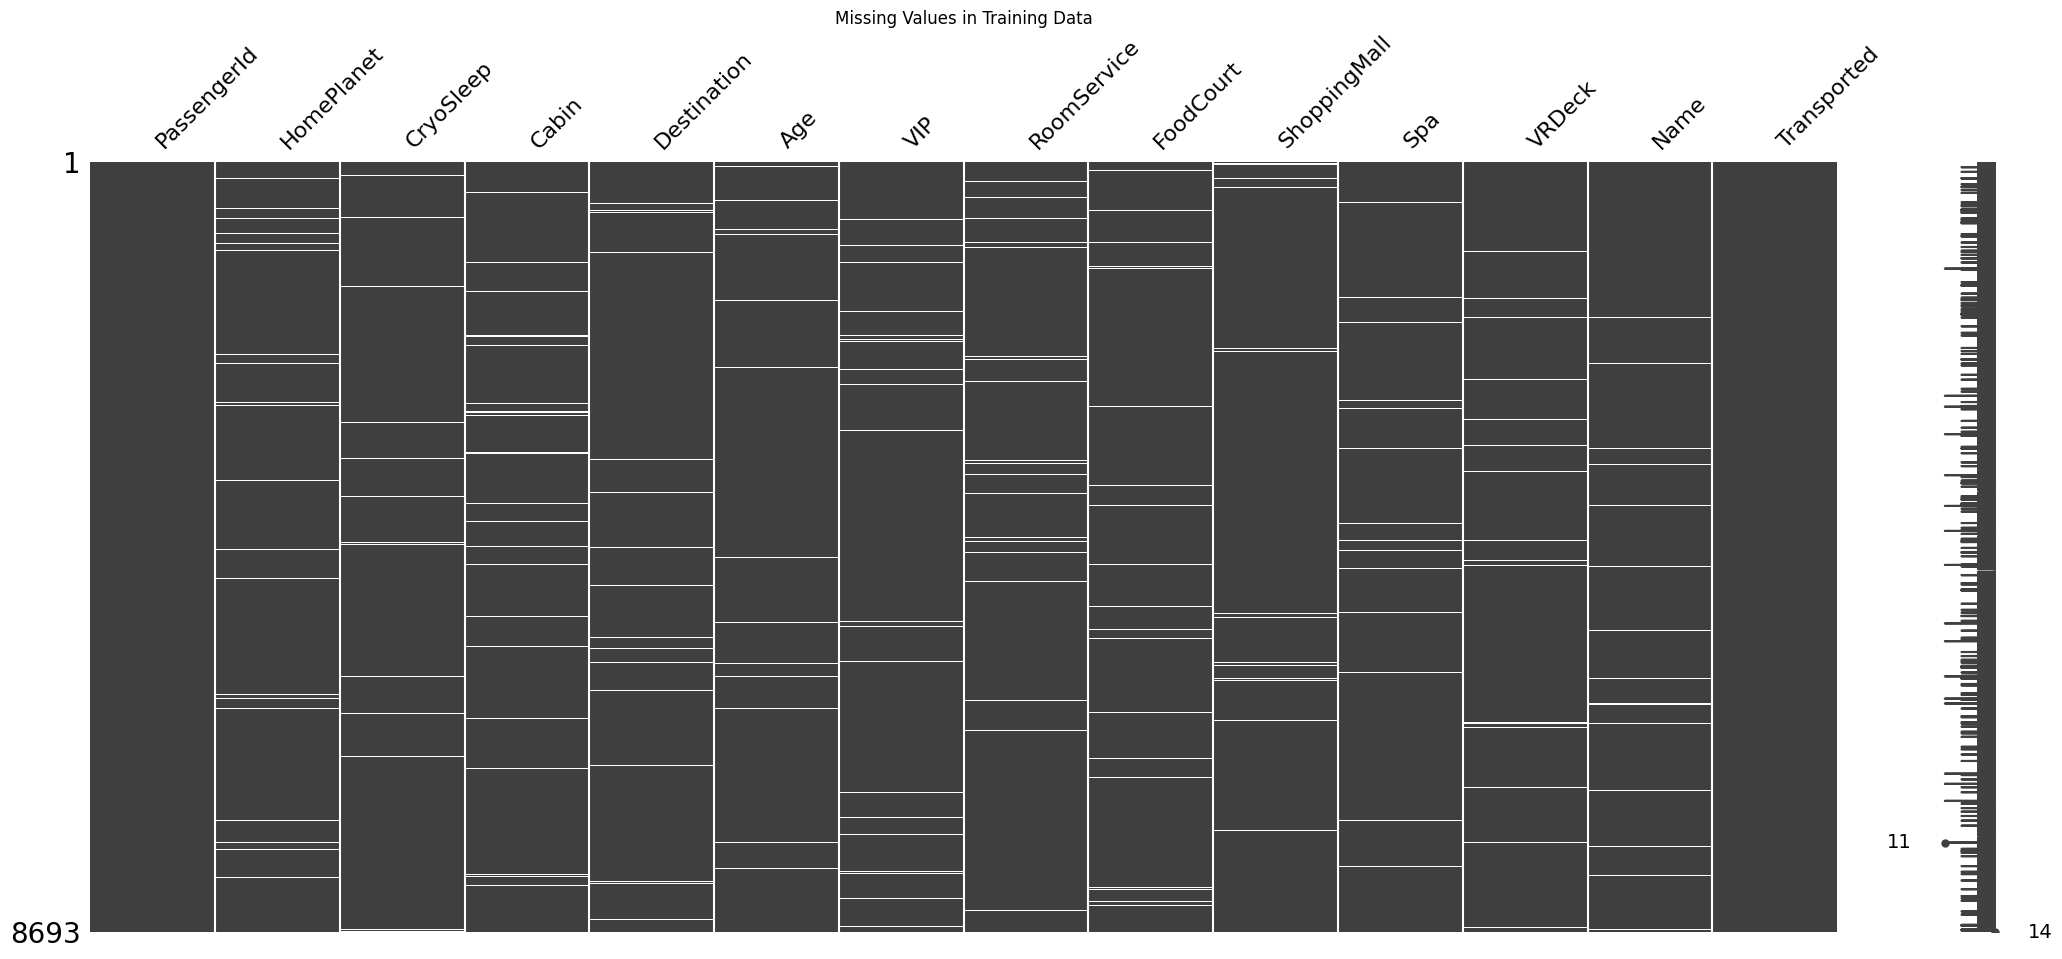

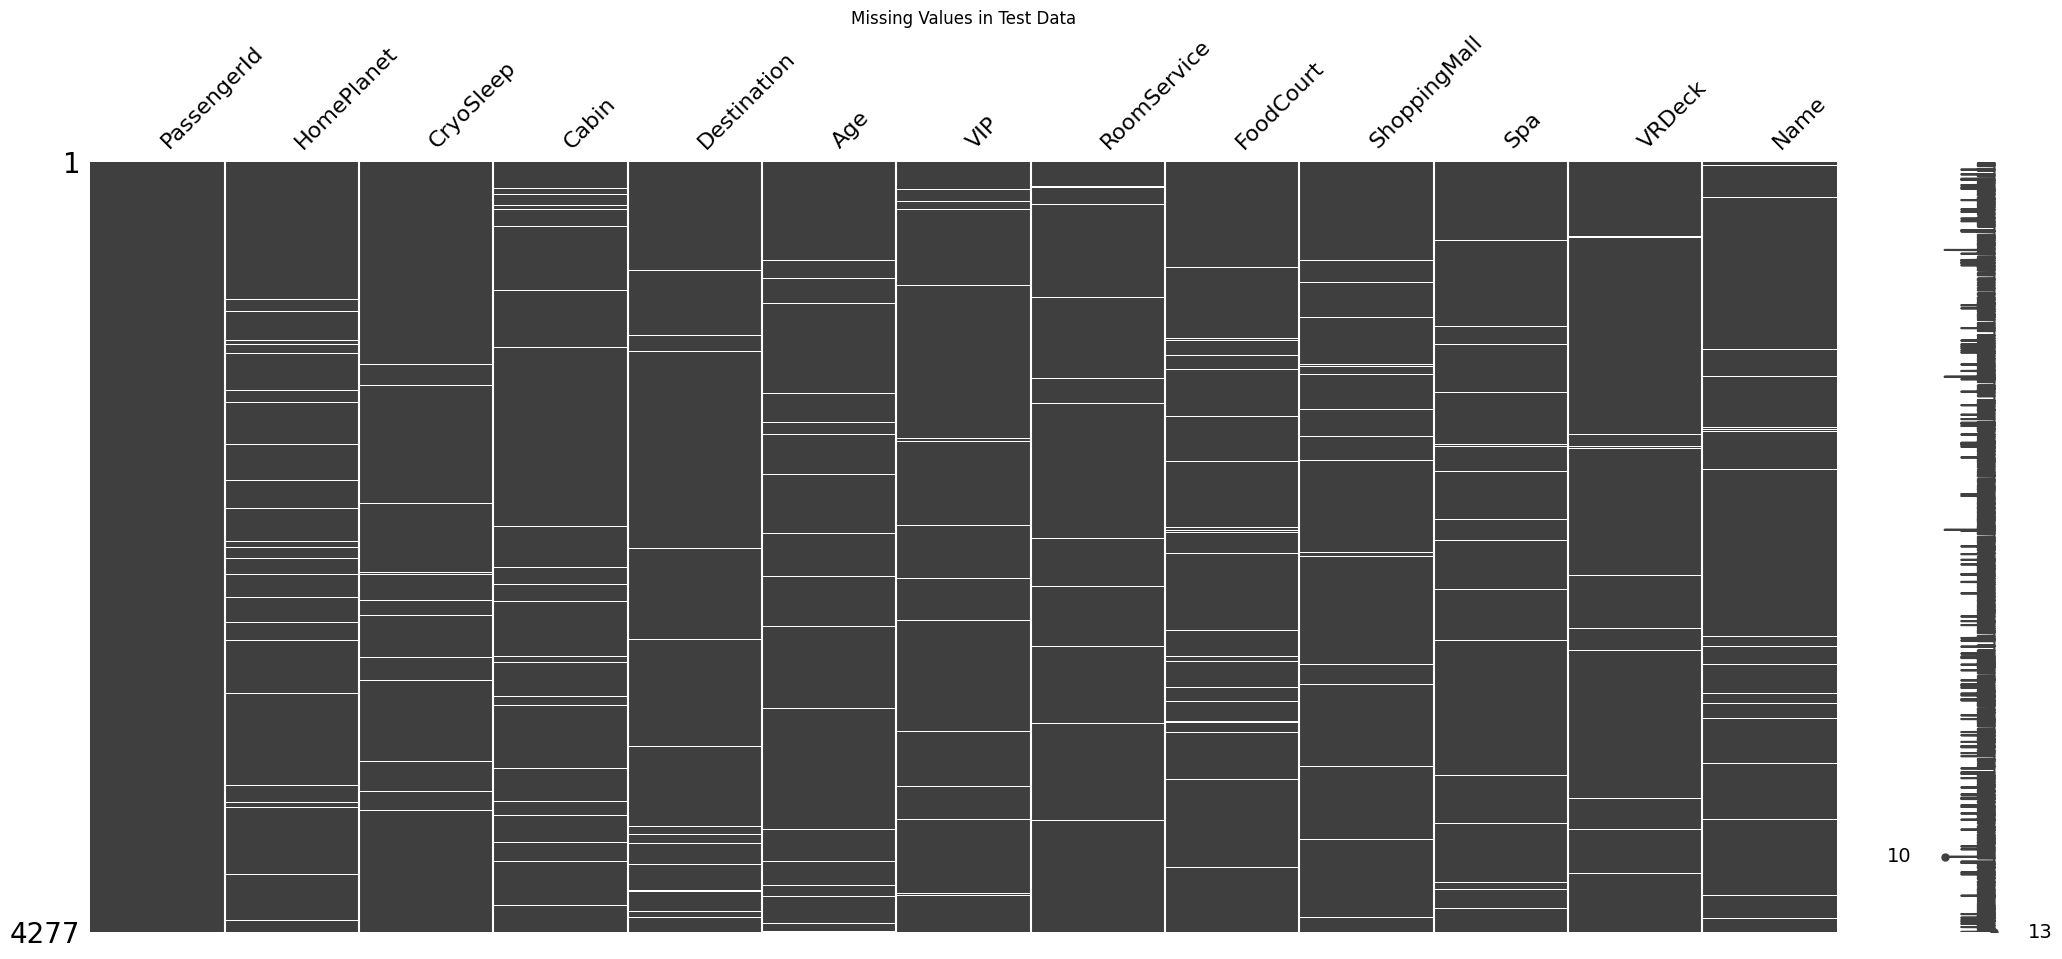

In [34]:
def visualize_missing_values(data, title):
  msno.matrix(data)
  plt.title(title)
  plt.show()

visualize_missing_values(train_dataset, 'Missing Values in Training Data')
visualize_missing_values(test_dataset, 'Missing Values in Test Data')